In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib
import numpy as np


Using matplotlib backend: TkAgg


In [2]:
n_examples = 1000 # number of training examples
training_steps =400 # number of steps we are going to train for
display_step = 10 # after multiples of this display the loss
learning_rate = 0.01 # multipliying factor on gradient
m, c = 6, -5 # gradient and y intercept of our line, edit these for a different linear problem

In [3]:
# A dataset of points around mx + c
def train_data(n, m, c):
  x = tf.random.normal([n]) # n values taken from a normal distribution, mean = 0, SD =1
  noise = tf.random.normal([n])# n values taken from a normal distribution, mean = 0, SD =1
  y = m*x + c + noise # our scatter plot
  return x, y

In [4]:
def prediction(x, weight, bias):
  return weight*x + bias # our predicted (learned)  m and c, expression is like y = m*x + c


In [5]:
# A loss function using mean-squared error
def loss(x, y, weights, biases):
  error = prediction(x, weights, biases) - y #  how 'wrong' our predicted (learned)  y is
  squared_error = tf.square(error)
  return tf.reduce_mean(input_tensor=squared_error) # overall mean of squared error.

In [6]:
# Find the derivative of loss with respect to weight and bias
def grad(x, y, weights, biases):
  with tf.GradientTape() as tape:
    loss_ = loss(x, y, weights, biases)
  return tape.gradient(loss_, [weights, biases]) # direction and value of the gradient of our loss w.r.t weight and bias

Initial loss: 90.243


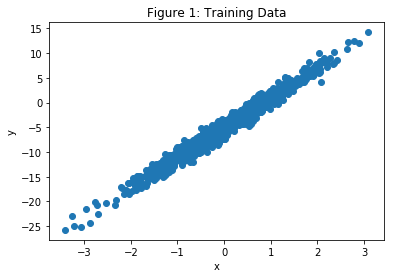

In [7]:
# Start with random values for W and B on the same batch of data
x, y = train_data(n_examples,m,c) # our training values x and  y
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 1: Training Data")
W = tf.Variable(np.random.randn()) # initial, random, value for predicted weight (m)
B = tf.Variable(np.random.randn()) # initial, random, value for predicted bias (c)

print("Initial loss: {:.3f}".format(loss(x, y, W, B)))

In [8]:
for step in range(training_steps): #iterate for each training step
    deltaW, deltaB = grad(x, y, W, B) # direction (sign)  and value of the gradient of our loss w.r.t weight and bias
    change_W = deltaW * learning_rate # adjustment amount for weight
    change_B = deltaB * learning_rate # adjustment amount for bias
    W.assign_sub(change_W) # subract change_W from W
    B.assign_sub(change_B) # subract change_B from B
    if step==0 or step % display_step == 0:
        # print(deltaW.numpy(), deltaB.numpy()) # uncomment if you want to see the gradients
        print("Loss at step {:02d}: {:.6f}".format(step, loss(x, y, W, B)))

Loss at step 00: 86.817169
Loss at step 10: 59.016361
Loss at step 20: 40.217892
Loss at step 30: 27.506660
Loss at step 40: 18.911522
Loss at step 50: 13.099622
Loss at step 60: 9.169707
Loss at step 70: 6.512362
Loss at step 80: 4.715503
Loss at step 90: 3.500499
Loss at step 100: 2.678933
Loss at step 110: 2.123400
Loss at step 120: 1.747758
Loss at step 130: 1.493754
Loss at step 140: 1.322001
Loss at step 150: 1.205863
Loss at step 160: 1.127334
Loss at step 170: 1.074233
Loss at step 180: 1.038327
Loss at step 190: 1.014048
Loss at step 200: 0.997631
Loss at step 210: 0.986530
Loss at step 220: 0.979024
Loss at step 230: 0.973949
Loss at step 240: 0.970517
Loss at step 250: 0.968196
Loss at step 260: 0.966627
Loss at step 270: 0.965566
Loss at step 280: 0.964848
Loss at step 290: 0.964363
Loss at step 300: 0.964035
Loss at step 310: 0.963813
Loss at step 320: 0.963663
Loss at step 330: 0.963562
Loss at step 340: 0.963493
Loss at step 350: 0.963447
Loss at step 360: 0.963415
Loss 

Final loss: 0.963
W = 6.004026412963867, B = -5.038877010345459
Compared with m = 6.0, c = -5.0  of the original line


Text(0.5, 1.0, 'Figure 2: Line of Best Fit')

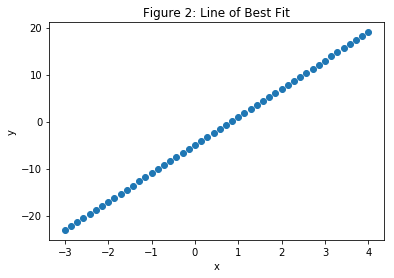

In [9]:
print("Final loss: {:.3f}".format(loss(x, y, W, B)))
print("W = {}, B = {}".format(W.numpy(), B.numpy()))
print("Compared with m = {:.1f}, c = {:.1f}".format(m, c)," of the original line")
xs = np.linspace(-3, 4, 50)
ys = W.numpy()*xs + B.numpy()
plt.scatter(xs,ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 2: Line of Best Fit")